In [1]:
# 1. population.csv 파일을 DataFrame으로 읽고 내용 확인
# 2. 현재 연구자 거주지 동의 인구 정보 조회 ( 행전체 )
# 3. 총인구수가 가장 많은 동 조회
# 4. 남성인구비가 가장 높은 동 조회
# 5. 도시 법정동 1선정, 농촌 법정동 1선정, 인구 분포 비교 (bar plot 사용)
# 6. 현재 연구자 거주지 동의 연령별 인구를 막대그래프로 표시


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
population_df = pd.read_csv("data-files/population.csv", encoding="utf-8")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6780\1717257733.py:1: DtypeWarning: Columns (100,101,103,198,199,200,305,306,307,309) have mixed types. Specify dtype option on import or set low_memory=False.
  population_df = pd.read_csv("data-files/population.csv", encoding="utf-8")


In [4]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Columns: 310 entries, 행정구역 to 2023년11월_여_100세 이상
dtypes: int64(8), object(302)
memory usage: 9.2+ MB


In [5]:
population_df.head()

,행정구역,2023년11월_계_총인구수,2023년11월_계_연령구간인구수,2023년11월_계_0세,2023년11월_계_1세,2023년11월_계_2세,2023년11월_계_3세,2023년11월_계_4세,2023년11월_계_5세,2023년11월_계_6세,...,2023년11월_여_91세,2023년11월_여_92세,2023년11월_여_93세,2023년11월_여_94세,2023년11월_여_95세,2023년11월_여_96세,2023년11월_여_97세,2023년11월_여_98세,2023년11월_여_99세,2023년11월_여_100세 이상
0,서울특별시 (1100000000),"9,390,925","9,390,925","37,876","41,294","43,322","43,749","47,776","50,756","55,314",...,"6,471","4,710","4,076","3,284","2,484","1,815","1,094",724,539,"1,123"
1,서울특별시 종로구 (1111000000),"139,497","139,497",393,469,464,495,539,561,663,...,111,94,85,53,57,43,24,12,11,27
2,서울특별시 종로구 청운효자동(1111051500),"11,359","11,359",40,46,41,51,54,44,74,...,11,11,5,4,7,1,2,0,2,2
3,서울특별시 종로구 사직동(1111053000),"9,005","9,005",26,25,43,36,41,49,55,...,6,9,9,9,3,2,1,3,0,3
4,서울특별시 종로구 삼청동(1111054000),"2,242","2,242",6,5,8,6,3,12,13,...,4,1,4,0,1,0,0,0,0,1


In [6]:
population_df.columns

Index(['행정구역', '2023년11월_계_총인구수', '2023년11월_계_연령구간인구수', '2023년11월_계_0세',
       '2023년11월_계_1세', '2023년11월_계_2세', '2023년11월_계_3세', '2023년11월_계_4세',
       '2023년11월_계_5세', '2023년11월_계_6세',
       ...
       '2023년11월_여_91세', '2023년11월_여_92세', '2023년11월_여_93세', '2023년11월_여_94세',
       '2023년11월_여_95세', '2023년11월_여_96세', '2023년11월_여_97세', '2023년11월_여_98세',
       '2023년11월_여_99세', '2023년11월_여_100세 이상'],
      dtype='object', length=310)

In [7]:
# 1번 문제
# mask = population_df["행정구역"].str.contains("동삭동")
mask = population_df["행정구역"].map(lambda v: "동삭동" in v)
print( mask.sum() )
population_df[mask]

1


,행정구역,2023년11월_계_총인구수,2023년11월_계_연령구간인구수,2023년11월_계_0세,2023년11월_계_1세,2023년11월_계_2세,2023년11월_계_3세,2023년11월_계_4세,2023년11월_계_5세,2023년11월_계_6세,...,2023년11월_여_91세,2023년11월_여_92세,2023년11월_여_93세,2023년11월_여_94세,2023년11월_여_95세,2023년11월_여_96세,2023년11월_여_97세,2023년11월_여_98세,2023년11월_여_99세,2023년11월_여_100세 이상
1497,경기도 평택시 동삭동(4122065000),"41,411","41,411",514,572,492,550,565,573,575,...,9,7,4,4,2,2,1,1,1,0


In [8]:
# 총인구수가 가장 많은 동 조회
# population_df["2023년11월_계_총인구수"] # 컬럼명을 직접 입력해서 조회
# population_df[population_df.columns[1]] # 컬럼목록으로 컬럼명 사용
# population_df.iloc[:, 1]
# population_df.iloc[:, 1].max() # 이상한 결과 값
population_df.iloc[:, 1].dtype # 원인은 자료형이 문자열이기 때문에 숫자 연산 불가

# int( population_df.iloc[1, 1].replace(",", "") ) # 변환 처리 내용
population_df.iloc[:, 1] = population_df.iloc[:, 1].map(lambda v: int(v.replace(",", "")))


In [9]:
max_population = population_df.iloc[:, 1].max() # 총인구수의 max 값
max_population_mask = population_df.iloc[:, 1] == max_population # max 값과 같은 행 filter
population_df[max_population_mask] # max 값과 같은 행만 뽑기 --> 결과는 경기도 인구 데이터 출력 

,행정구역,2023년11월_계_총인구수,2023년11월_계_연령구간인구수,2023년11월_계_0세,2023년11월_계_1세,2023년11월_계_2세,2023년11월_계_3세,2023년11월_계_4세,2023년11월_계_5세,2023년11월_계_6세,...,2023년11월_여_91세,2023년11월_여_92세,2023년11월_여_93세,2023년11월_여_94세,2023년11월_여_95세,2023년11월_여_96세,2023년11월_여_97세,2023년11월_여_98세,2023년11월_여_99세,2023년11월_여_100세 이상
1288,경기도 (4100000000),13628135,"13,628,135","68,151","77,872","80,879","84,069","92,803","99,983","107,983",...,"9,387","6,864","5,901","4,581","3,531","2,492","1,536","1,103",683,"1,460"


In [10]:
area_mask = population_df.iloc[:, 0].map(lambda v: v[-6] != '0')
max_population = population_df.iloc[:, 1][area_mask].max() # 총인구수의 max 값
max_population_mask = population_df.iloc[:, 1] == max_population # max 값과 같은 행 filter
population_df[max_population_mask] # max 값과 같은 행만 뽑기 --> 결과는 경기도 인구 데이터 출력 

,행정구역,2023년11월_계_총인구수,2023년11월_계_연령구간인구수,2023년11월_계_0세,2023년11월_계_1세,2023년11월_계_2세,2023년11월_계_3세,2023년11월_계_4세,2023년11월_계_5세,2023년11월_계_6세,...,2023년11월_여_91세,2023년11월_여_92세,2023년11월_여_93세,2023년11월_여_94세,2023년11월_여_95세,2023년11월_여_96세,2023년11월_여_97세,2023년11월_여_98세,2023년11월_여_99세,2023년11월_여_100세 이상
1446,경기도 부천시 신중동(4119074200),127887,"127,887",623,720,709,745,752,837,877,...,92,72,53,45,41,23,10,13,7,17


In [ ]:
# 6번 문제
mask = population_df["행정구역"].str.contains("동삭동")
selected_region = population_df[mask]
selected_region.iloc[:, 3:104]
selected_region.iloc[:, 3:104].values # series.values or dataframe.values : 값만 ndarray로 반환
y = selected_region.iloc[:, 3:104].values[0]
y = list( map(lambda v: int( str(v).replace(',', '') ), y) )
y

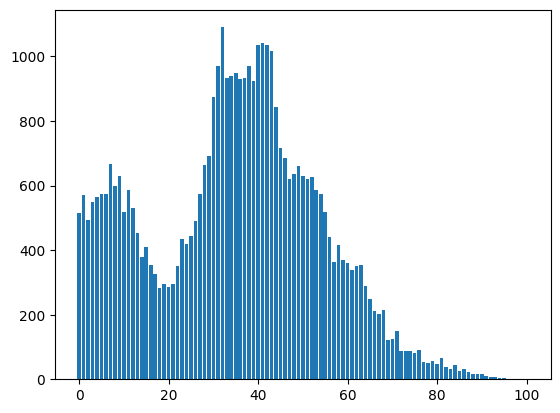

In [14]:
plt.bar(np.arange(0, 101), y)
plt.show()

In [ ]:
# 남성 인구비가 가장 높은 법정동
# 1. 각 행정구역단위별로 남성 인구비 계산(남성/전체 or 남성/여성) -> 컬럼으로 추가
# 2. 남성 인구비 컬럼의 max 값 조회
# 3. 해당하는 행 찾기
# 4. 해당 행의 남성 인구분포와 여성인구분포를 bar plot으로 표현

In [15]:
# 데이터 다시 읽기
population_df = pd.read_csv("data-files/population.csv", encoding="utf-8")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6780\1717257733.py:1: DtypeWarning: Columns (100,101,103,198,199,200,305,306,307,309) have mixed types. Specify dtype option on import or set low_memory=False.
  population_df = pd.read_csv("data-files/population.csv", encoding="utf-8")


In [17]:
male_population = \
    population_df["2023년11월_남_총인구수"].map(lambda v: int(v.replace(",", "")))
female_population = \
    population_df["2023년11월_여_총인구수"].map(lambda v: int(v.replace(",", "")))
all_population = \
    population_df["2023년11월_계_총인구수"].map(lambda v: int(v.replace(",", "")))

male_ratio1 = male_population / female_population # 리스트 내의 각 요소별로 나눗셈
male_ratio2 = male_population / all_population

In [20]:
population_df['male_ratio_to_female'] = male_ratio1
population_df['male_ratio_to_all'] = male_ratio2

In [ ]:
# max_ratio = population_df['male_ratio_to_all'].max()
# population_df[population_df['male_ratio_to_all'] == max_ratio]

population_df['male_ratio_to_all'].argmax() # series 내 가장 큰 값의 위치 번호
max_idx = population_df['male_ratio_to_all'].argmax()
population_df.iloc[max_idx, :]
max_ratio_row = population_df.iloc[max_idx, :].values
max_ratio_row

In [34]:
population_df.columns[100:110]
population_df.columns[106:207] # 남0세 ~ 남100세이상
male_population_per_age = max_ratio_row[106:207]
population_df.columns[208:220]
population_df.columns[209:310] # 여0세 ~ 여100세이상
female_population_per_age = max_ratio_row[209:310]

male_population_per_age, female_population_per_age

male_population_per_age, female_population_per_age = \
    map(lambda v: int(str(v).replace(",", "")), male_population_per_age), \
    map(lambda v: int(str(v).replace(",", "")), female_population_per_age) # str -> int

# list(male_population_per_age), list(female_population_per_age) # 꼭 주석해야 합니다.
male_population_per_age, female_population_per_age = \
    list(male_population_per_age), list(female_population_per_age) #map -> list

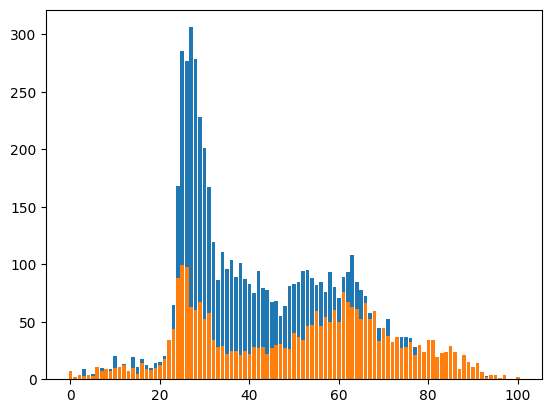

In [37]:
plt.bar(np.arange(101), male_population_per_age)
plt.bar(np.arange(101), female_population_per_age)
plt.show()

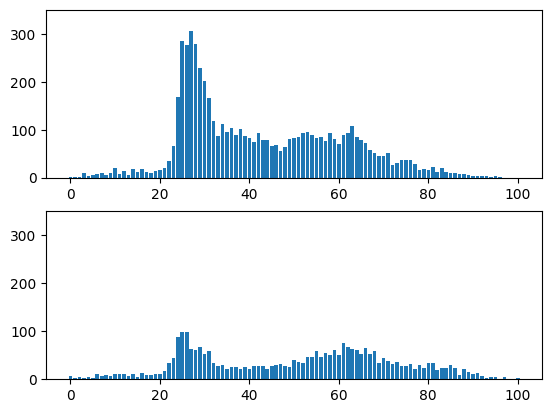

In [43]:
axes1 = plt.subplot(2, 1, 1) # 한 개의 axes 생성
axes1.bar(np.arange(101), male_population_per_age)
axes1.set_ylim((0, 350)) # == plt.ylim((0, 350))
axes2 = plt.subplot(2, 1, 2)
axes2.bar(np.arange(101), female_population_per_age)
plt.ylim((0, 350))
plt.show()

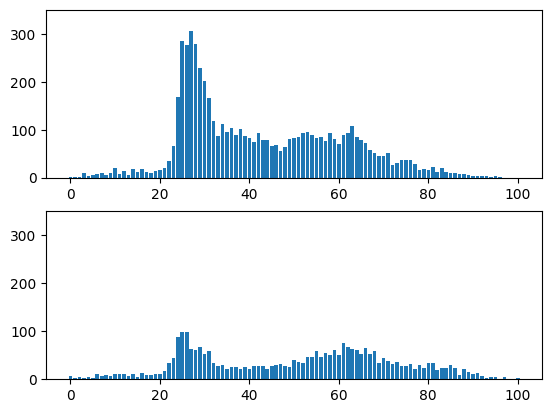

In [44]:
figure, ax = plt.subplots(2, 1) # 미리 모든 axes 만들기 (여기서는 2개)
ax[0].bar(np.arange(101), male_population_per_age)
ax[0].set_ylim((0, 350)) # == plt.ylim((0, 350))
ax[1].bar(np.arange(101), female_population_per_age)
plt.ylim((0, 350))
plt.show()

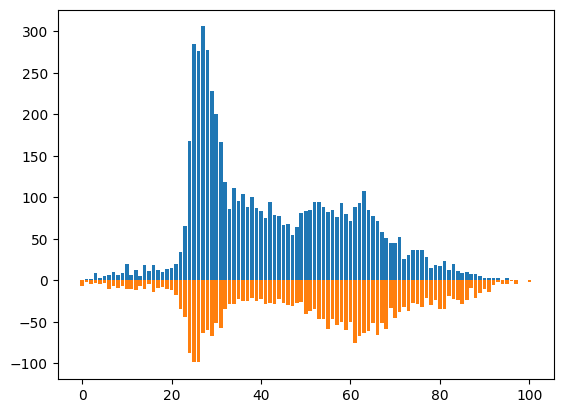

In [46]:
plt.bar(np.arange(101), male_population_per_age)
plt.bar(np.arange(101), -np.array(female_population_per_age))
plt.show()

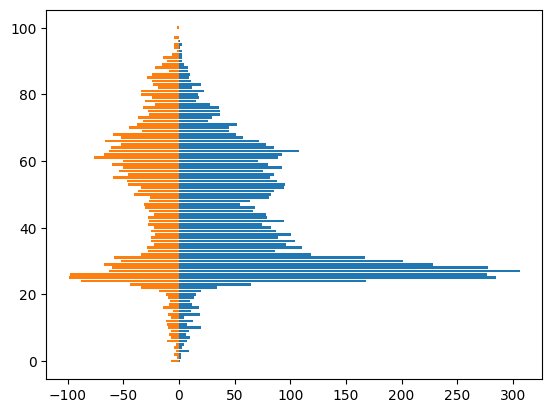

In [47]:
plt.barh(np.arange(101), male_population_per_age)
plt.barh(np.arange(101), -np.array(female_population_per_age))
plt.show()

In [48]:
# 도시(역삼동) - 농촌(이천-부발읍) 인구 분포 비교

# 데이터 다시 읽기
population_df = pd.read_csv("data-files/population.csv", encoding="utf-8")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6780\844974686.py:5: DtypeWarning: Columns (100,101,103,198,199,200,305,306,307,309) have mixed types. Specify dtype option on import or set low_memory=False.
  population_df = pd.read_csv("data-files/population.csv", encoding="utf-8")


In [97]:
ys_population_df = population_df[population_df["행정구역"].str.contains("신림동")]
ys_population_df

,행정구역,2023년11월_계_총인구수,2023년11월_계_연령구간인구수,2023년11월_계_0세,2023년11월_계_1세,2023년11월_계_2세,2023년11월_계_3세,2023년11월_계_4세,2023년11월_계_5세,2023년11월_계_6세,...,2023년11월_여_91세,2023년11월_여_92세,2023년11월_여_93세,2023년11월_여_94세,2023년11월_여_95세,2023년11월_여_96세,2023년11월_여_97세,2023년11월_여_98세,2023년11월_여_99세,2023년11월_여_100세 이상
355,서울특별시 관악구 신림동(1162069500),"22,863","22,863",25,37,17,26,25,18,21,...,7,2,2,3,1,1,4,0,0,1


In [98]:
# 지정한 지역 데이터 조회
ys_population_df = population_df[population_df["행정구역"].str.contains("신림동")]
bb_population_df = population_df[population_df["행정구역"].str.contains("거제시 남부면")]

In [99]:
type(ys_population_df), ys_population_df.shape

(pandas.core.frame.DataFrame, (1, 310))

In [100]:
# 연령별 인구 뽑기 -> 리스트 or ndarray 등에 담기
ys_population = ys_population_df.iloc[:, 3:104].values[0] # dataframe.values -> ndarray
# ys_population.shape
bb_population = bb_population_df.values[0][3:104]

In [101]:
# ndarray의 각 데이터를 str -> int로 변경
ys_population = map(lambda v: int( str(v).replace(",", "") ), ys_population)
ys_population = list(ys_population) # 반복자 -> 데이터 ( map object -> list )
bb_population = map(lambda v: int( str(v).replace(",", "") ), bb_population)
bb_population = list(bb_population)

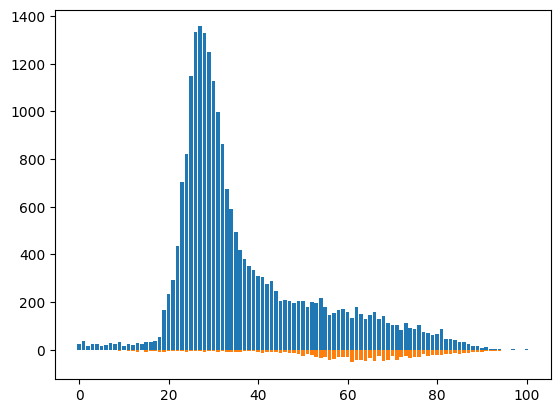

In [102]:
# 시각화 (막대 그래프)
plt.bar(np.arange(101), ys_population)
plt.bar(np.arange(101), -np.array(bb_population))
plt.show()

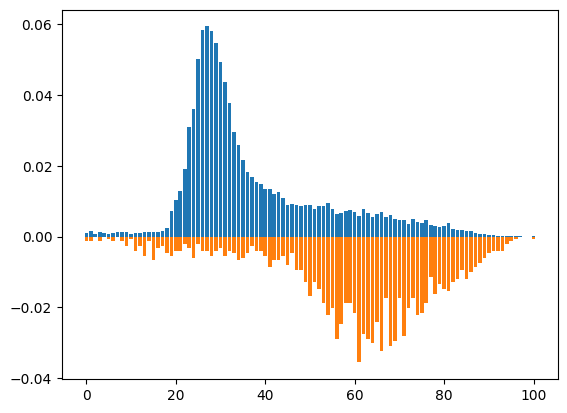

In [103]:
# 시각화 (막대 그래프)
ys_population = np.array(ys_population)
bb_population = np.array(bb_population)
plt.bar(np.arange(101), ys_population/ys_population.sum())
plt.bar(np.arange(101), -bb_population/bb_population.sum())
plt.show()

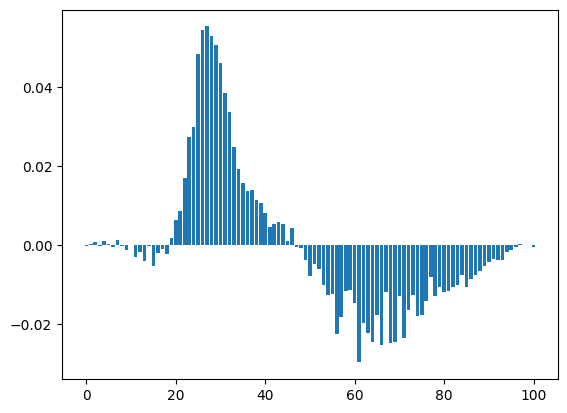

In [104]:
# 시각화 (막대 그래프)
ys_ratio = ys_population/ys_population.sum()
bb_ratio = bb_population/bb_population.sum()
mixed_ratio = ys_ratio - bb_ratio
plt.bar(np.arange(101), mixed_ratio)
plt.show()